In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from my_function import *

In [57]:
data = pd.read_csv('C:\Th-th-ch-BAI-Labs\Bai_4\data\Mall_Customers.csv')
df = data.copy()
df.pop('CustomerID')
df.pop('Genre')
scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = ['Age','Annual Income (k$)','Spending Score (1-100)'])

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18192\1914305577.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv('C:\Th-th-ch-BAI-Labs\Bai_4\data\Mall_Customers.csv')


In [58]:
optics = OPTICS(min_samples = 5, xi = 0.05, min_cluster_size = 0.05)
labels = optics.fit_predict(df)

In [59]:
data['Label'] = labels

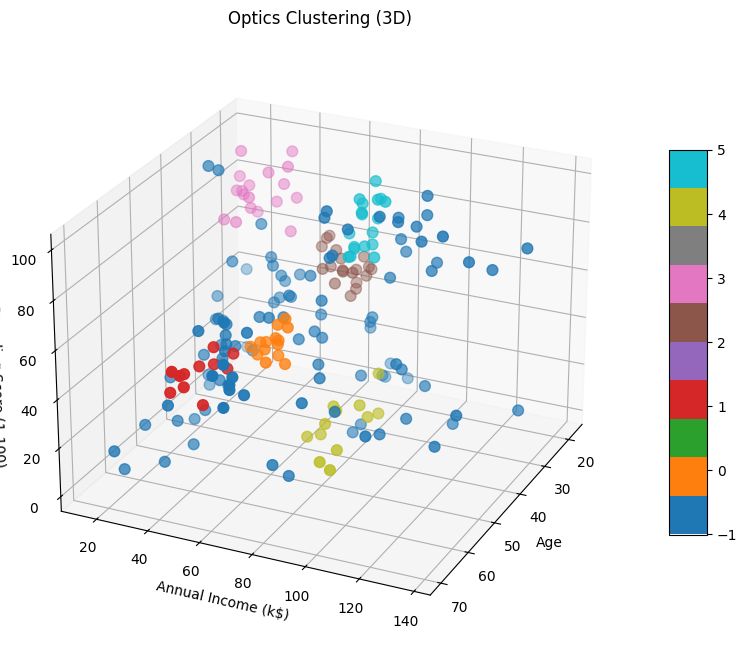

In [61]:

# --- 5. Vẽ biểu đồ 3D ---
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Vẽ cụm
scatter = ax.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Label'],
    cmap='tab10',
    s=60
)

# Đặt tên trục
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Optics Clustering (3D)')

# Hiển thị màu cụm
plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

# (Tuỳ chọn) chỉnh góc nhìn
ax.view_init(elev=25, azim=25)

plt.show()